In [2]:
import keras
import tensorflow as tf
import numpy as np
import csv
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [13]:
def get_input_data(lstm_input):    
    lstm_input['date'] = pd.to_datetime(lstm_input['date'])
    
    # Assigning Binary variables for each day
    lstm_input['WeekOfDay'] = lstm_input['date'].dt.day_name()
    lstm_input.loc[lstm_input['WeekOfDay'].str.contains('Monday'), 'Mon'] = 1
    lstm_input.loc[lstm_input['WeekOfDay'].str.contains('Tuesday'), 'Tue'] = 1
    lstm_input.loc[lstm_input['WeekOfDay'].str.contains('Wednesday'), 'Wed'] = 1
    lstm_input.loc[lstm_input['WeekOfDay'].str.contains('Thursday'), 'Thr'] = 1
    lstm_input.loc[lstm_input['WeekOfDay'].str.contains('Friday'), 'Fri'] = 1
    lstm_input.loc[lstm_input['WeekOfDay'].str.contains('Saturday'), 'Sat'] = 1
    lstm_input.loc[lstm_input['WeekOfDay'].str.contains('Sunday'), 'Sun'] = 1
    lstm_input = lstm_input.drop(['WeekOfDay'], axis=1)
    lstm_input = lstm_input.fillna(0)
    
    # Rearrange the order of columns
    cols = ['date', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sun', 'X','Y']
    lstm_input = lstm_input[cols]
    lstm_input = lstm_input.set_index('date')
    
    return lstm_input

In [14]:
def convert_input_structure(proportion, LSTM_Train):
    # Split training, validation, and test dataset
    dataset1 = LSTM_Train.values
    dataset1 = dataset1.astype('float32')
    
    # To obtain the validation data
    train_proportion = proportion
    
    # Split train set and test set
    train = dataset1[:train_proportion, :]
    valid = dataset1[train_proportion:, :]
    
    # split the dataset as train, validation, and test
    train_X, train_y = train[:, :-1], train[:, -1]
    valid_X, valid_y = valid[:, :-1], valid[:, -1]
    
    # reshape input to be 3-D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    valid_X = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))

    return train_X, train_y, valid_X, valid_y

def convert_test_structure(LSTM_Test):
    # Split training, validation, and test dataset
    dataset2 = LSTM_Test.values
    dataset2 = dataset2.astype('float32')
    
    test_X, test_y = dataset2[:, :-1], dataset2[:, -1]
    test_X = test_X.reshape(((test_X.shape[0], 1, test_X.shape[1])))

    return test_X, test_y

In [15]:
def build_LSTM_structure(conv_data):
    # design network
    model = Sequential()
    # Two-layered LSTM
    model.add(LSTM(10, return_sequences=True, input_shape=(conv_data[0].shape[1], conv_data[0].shape[2])))
    model.add(LSTM(10))
    # Activation function is defined as a linear formula
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')

    # fit network
    history = model.fit(conv_data[0], conv_data[1], epochs=500, batch_size = 10, validation_data=(conv_data[2], conv_data[3]), verbose=2, shuffle=False)
    
    return model, history

In [16]:
# Get the training data and trained LSTM
LSTM_Train = get_input_data(pd.read_csv('Residuals_for_LSTM_Training.csv'))
conv_data = convert_input_structure(800, LSTM_Train) 
Trained_LSTM = build_LSTM_structure(conv_data)

# Plot the validation loss function
# plt.plot(Trained_LSTM[1].history['val_loss'])
# To store the result
# pd.DataFrame(history.history['val_loss']).to_csv('yellow_valid.csv')

Train on 800 samples, validate on 130 samples
Epoch 1/500
 - 1s - loss: 0.0097 - val_loss: 0.0095
Epoch 2/500
 - 0s - loss: 0.0093 - val_loss: 0.0087
Epoch 3/500
 - 0s - loss: 0.0085 - val_loss: 0.0074
Epoch 4/500
 - 0s - loss: 0.0074 - val_loss: 0.0063
Epoch 5/500
 - 0s - loss: 0.0064 - val_loss: 0.0059
Epoch 6/500
 - 0s - loss: 0.0059 - val_loss: 0.0060
Epoch 7/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 8/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 9/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 10/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 11/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 12/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 13/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 14/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 15/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 16/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 17/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 18/500
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 19/

Epoch 154/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 155/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 156/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 157/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 158/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 159/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 160/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 161/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 162/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 163/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 164/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 165/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 166/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 167/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 168/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 169/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 170/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 171/500
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 307/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 308/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 309/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 310/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 311/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 312/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 313/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 314/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 315/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 316/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 317/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 318/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 319/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 320/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 321/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 322/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 323/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 459/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 460/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 461/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 462/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 463/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 464/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 465/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 466/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 467/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 468/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 469/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 470/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 471/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 472/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 473/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 474/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 475/500
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 476/500
 - 0s - loss: 

In [17]:
# Create the data structure for the test data
# Load Test Data
LSTM_Test = get_input_data(pd.read_csv('Residuals_for_LSTM_Test.csv'))
conv_test = convert_test_structure(LSTM_Test)

# Check the train and validation result
y_hat_train = Trained_LSTM[0].predict(conv_data[0])
y_hat_valid = Trained_LSTM[0].predict(conv_data[2])

# Predict the test data
y_hat = Trained_LSTM[0].predict(conv_test[0])

# RMSE Test
from math import sqrt
RMSE_valid = sqrt(mean_squared_error(y_hat_valid, conv_data[3]))
RMSE_test = sqrt(mean_squared_error(y_hat, conv_test[1]))
print("validation:", RMSE_valid, "and", "Test:",RMSE_test)

# Derive the r-square value
from sklearn.metrics import r2_score
print("r-squared:", r2_score(conv_test[1], y_hat))

# plt.plot(y_hat)
# plt.plot(conv_test[1])

# To store the test and the predicted results
pd.DataFrame(y_hat_train).to_csv('Train_Results_yellow_taxi.csv')
pd.DataFrame(y_hat_valid).to_csv('Valid_Results_yellow_taxi.csv')

pd.DataFrame(conv_data[1]).to_csv('Train_test_yellow_taxi.csv')
pd.DataFrame(conv_data[3]).to_csv('Valid_test_yellow_taxi.csv')

pd.DataFrame(y_hat).to_csv('Residual_Results_yellow_taxi.csv')
pd.DataFrame(conv_test[1]).to_csv('Residual_test_yellow_taxi.csv')

validation: 0.0776911011250218 and Test: 0.1503971953009562
r-squared: 0.37283509155684247


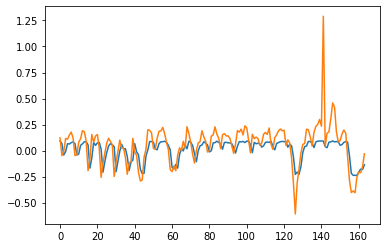

In [19]:
plt.plot(y_hat)
plt.plot(conv_test[1])

In [ ]:
pd.DataFrame(y_hat).to_csv('Residual_Results_yellow_taxi.csv')
pd.DataFrame(conv_test[1]).to_csv('Residual_test_yellow_taxi.csv')